# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import string
import re

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import recall_score,precision_score,classification_report,balanced_accuracy_score,f1_score

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

In [9]:
from sklearn.model_selection import train_test_split

## Data Overview

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_copy = train.copy()
test_copy = test.copy()

In [11]:
print(train.head(3))

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1  


In [12]:
print(test.head(3))

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...


In [13]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [14]:
print(train.isnull().sum())
print("-------------")
print(test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
-------------
id             0
keyword       26
location    1105
text           0
dtype: int64


0    4342
1    3271
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

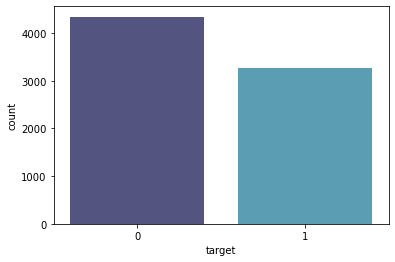

In [15]:
print(train["target"].value_counts())
sns.countplot(x="target",data=train,palette='ocean',alpha=0.7)

In [16]:
print(train.keyword.nunique())
print(test.keyword.nunique())

221
221


In [17]:
set_difference = set(train.keyword.unique())-set(test.keyword.unique())
set_difference

set()

<AxesSubplot:title={'center':'Most frequent keywords in the train dataset'}>

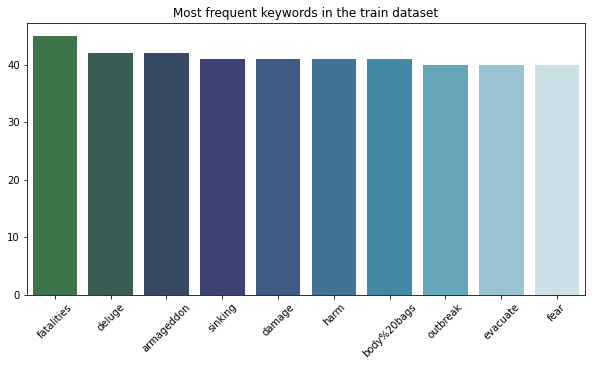

In [18]:
train_key=train.keyword.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Most frequent keywords in the train dataset")
sns.barplot(train_key.index,train_key.values,palette="ocean",alpha=0.8)

In [19]:
disaster=train.loc[train["target"]==1]
not_a_disaster=train.loc[train["target"]==0]

<AxesSubplot:title={'center':'Most frequent keywords for a disaster'}>

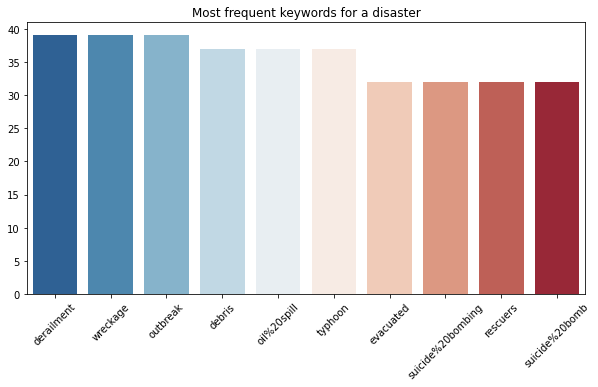

In [20]:
disaster_key=disaster.keyword.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Most frequent keywords for a disaster")
sns.barplot(disaster_key.index,disaster_key.values,palette="RdBu_r")

<AxesSubplot:title={'center':'Most frequent keywords for a disaster'}>

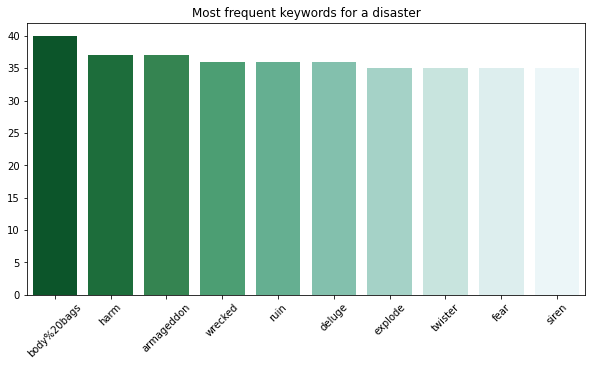

In [21]:
nondisaster_key=not_a_disaster.keyword.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Most frequent keywords for a disaster")
sns.barplot(nondisaster_key.index,nondisaster_key.values,palette="BuGn_r")

<AxesSubplot:title={'center':'Most frequent locations in the disaster dataset'}>

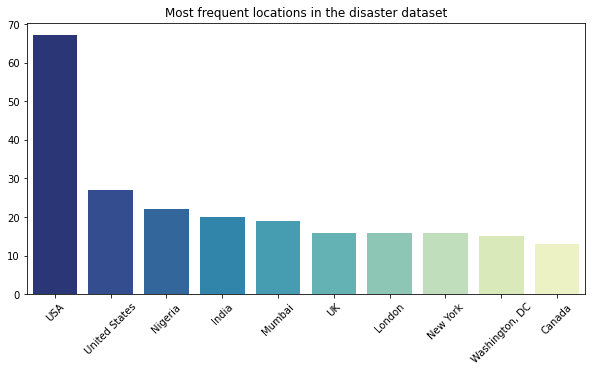

In [22]:
disaster_loc=disaster.location.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Most frequent locations in the disaster dataset")
sns.barplot(disaster_loc.index,disaster_loc.values,palette="YlGnBu_r")

<AxesSubplot:title={'center':'Most frequent locations in the not_a_disaster dataset'}>

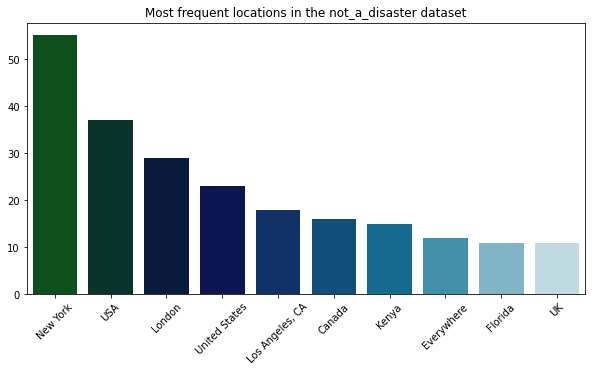

In [23]:
nondisaster_loc=not_a_disaster.location.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Most frequent locations in the not_a_disaster dataset")
sns.barplot(nondisaster_loc.index,nondisaster_loc.values,palette="ocean")

## Data Cleaning

In [24]:
train=train.fillna('')
test=test.fillna('')

In [25]:
def clean1(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [26]:
train["text"]=train["text"].apply(lambda x: clean1(x))
test["text"]=test["text"].apply(lambda x: clean1(x))

In [27]:
def clean2(string):
  tweet=string.lower()
  tweet=re.sub(r"https?\S+"," ",tweet)
  tweet=re.sub("#"," ",tweet)
  tweet=re.sub(r"^@\w+"," ",tweet)
  return tweet

In [28]:
train["text"]=train["text"].apply(lambda x: clean2(x))
test["text"]=test["text"].apply(lambda x: clean2(x))

In [29]:
#using the TreeBankWordTokenizer
train["text"]=train["text"].apply(lambda x: tokenizer.tokenize(x))
test["text"]=test["text"].apply(lambda x: tokenizer.tokenize(x))

In [30]:
def clean3(string):
  tweet = ' '.join(string)
  tweet=re.sub("'s","is",tweet)
  tweet=re.sub("n't","not",tweet)
  tweet=re.sub("'m","am",tweet)
  return tweet    

In [31]:
train["text"]=train["text"].apply(lambda x: clean3(x))
test["text"]=test["text"].apply(lambda x: clean3(x))

In [32]:
def clean4(string):
  tweet=string
  tweet=re.sub(r"\W+"," ",tweet)
  tweet=re.sub(r"\d+"," ",tweet)
  tweet=re.sub("_"," ",tweet)
  tweet=re.sub(r"\b\w\w\b"," ",tweet)
  tweet=re.sub(r"\b\w\b"," ",tweet)
  return tweet

In [33]:
train["text"]=train["text"].apply(lambda x: clean4(x))
test["text"]=test["text"].apply(lambda x: clean4(x))

In [34]:
#Location
loc=set(train["location"])
loc

{'',
 'Bandar Lampung, Indonesia',
 'heart of darkness, unholy ?',
 'Nelspruit, South Africa',
 'Our Empire State',
 'Arlington, VA',
 'Chamblee, Georgia',
 'Where the money at',
 '???????????',
 'San Juan, Puerto Rico',
 'Amsterdam',
 'KurveZ@GearHeadCentral.net',
 'chicago',
 'Blackpool, England, UK.',
 'Medford, Oregon',
 'Raleigh (Garner/Cleveland) NC',
 'Brisbane.',
 'atlanta',
 'Maldives',
 'Des Moines, Iowa ',
 'ACCRA GHANA',
 'Ojodu,Lagos',
 'Between Dire and Radiant',
 'Scotland',
 'Black Canyon New River, AZ',
 'Singapore',
 'Florida, USA',
 'Alexandria, Egypt.',
 'Menlo Park. SFO. The World.',
 'Nairobi-KENYA',
 'East Lansing, MI',
 'nyc',
 'South Carolina',
 'lakewood colorado',
 'BROOKLYN, NYC',
 'Am International',
 'Chicago, IL ',
 'Magnolia',
 'Above the snake line - #YoNews',
 'Hyrule',
 'maryland',
 'Behind The Obama Curtain',
 'Brooklyn, New York',
 'Las Cruces, NM',
 'Nakhon Si Thammarat',
 'New Delhi, India',
 'Voorhees, NJ',
 'Lexington',
 'Planet of da Bathing Ap

In [35]:
def loc_clean1(string):
  location=string
  location=re.sub(r"\d+"," ",location)
  location=re.sub(r"\W+"," ",location)
  return location
     

In [36]:
train["location"]=train["location"].apply(lambda x: loc_clean1(x))
test["location"]=test["location"].apply(lambda x: loc_clean1(x))

In [37]:
#Keywords
key=set(train["keyword"])
key

{'',
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',

In [38]:
train["keyword"]=train["keyword"].apply(lambda x: loc_clean1(x))
test["keyword"]=test["keyword"].apply(lambda x: loc_clean1(x))

In [39]:
train["data"] = train['keyword'] +' '+ train['location'] +' '+ train['text']
test["data"] = test['keyword'] +' '+ test['location'] +' '+ test['text']

# Stemming


In [40]:
"""train["text"]=[ps.stem(word) for word in train.text if 
                     word not in set(stopwords.words('english'))]
test["text"]=[ps.stem(word) for word in test.text if 
                     word not in set(stopwords.words('english'))] """

'train["text"]=[ps.stem(word) for word in train.text if \n                     word not in set(stopwords.words(\'english\'))]\ntest["text"]=[ps.stem(word) for word in test.text if \n                     word not in set(stopwords.words(\'english\'))] '

# Lemmatizing

In [41]:
"""train["text"]=[lemmatizer.lemmatize(word) for word in train.text if 
                     word not in set(stopwords.words('english'))]
test["text"]=[lemmatizer.lemmatize(word) for word in test.text if 
                     word not in set(stopwords.words('english'))]"""

'train["text"]=[lemmatizer.lemmatize(word) for word in train.text if \n                     word not in set(stopwords.words(\'english\'))]\ntest["text"]=[lemmatizer.lemmatize(word) for word in test.text if \n                     word not in set(stopwords.words(\'english\'))]'

# Vectorizer

In [42]:
#CountVectorizer
cv = CountVectorizer(ngram_range = (1,3))
text_counts_train= cv.fit_transform(train["text"])
text_counts_test= cv.transform(test["text"])

In [43]:
X=text_counts_train
y=train[["target"]]
test1=text_counts_test

In [44]:
#Tf-idf Vectorizer
"""tfidf_v=TfidfVectorizer(ngram_range=(1,3))
text_tf_train=tfidf_v.fit_transform(train["text_train"])
text_tf_test=tfidf_v.transform(test["text_train"])"""

'tfidf_v=TfidfVectorizer(ngram_range=(1,3))\ntext_tf_train=tfidf_v.fit_transform(train["text_train"])\ntext_tf_test=tfidf_v.transform(test["text_train"])'

In [45]:
"""X_train=text_tf_train
y_train=train[["target"]]
X_test=text_tf_test """

'X_train=text_tf_train\ny_train=train[["target"]]\nX_test=text_tf_test '

## Modelling

In [47]:
#split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=9)

# LogisticRegression

In [48]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[1299,  129],
       [ 364,  721]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.8038201352964585

In [51]:
log.fit(X,y)
y_pred = log.predict(test1)

# NaiveBayes

In [52]:
clf = MultinomialNB().fit(X,y)
y_pred = clf.predict(test1)

In [53]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={0:'target'},inplace=True)
id=test_copy[["id"]]
y_pred=pd.concat([id,y_pred],axis=1)
y_pred=pd.DataFrame(y_pred)

# Exporting Output

In [54]:
#exportcsv
export_csv=y_pred.to_csv('Output.csv',index=None,header=True)